<a href="https://colab.research.google.com/github/NishaMDev/ML-Learning/blob/main/Assignment%234/ML_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder , MinMaxScaler , LabelEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from sklearn import linear_model, tree, ensemble
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import time

In [ ]:
#EVENT_FILE_PATH = "/content/drive/My Drive/ML_DataSet/events.csv"
#GINFO_FILE_PATH = "/content/drive/My Drive/ML_DataSet/ginf.csv"
game_url_2018_2019 ="https://datahub.io/sports-data/english-premier-league/r/0.csv"
game_url_2017_2018 = "https://datahub.io/sports-data/english-premier-league/r/1.csv"
game_url_2016_2017 = "https://datahub.io/sports-data/english-premier-league/r/2.csv"
game_url_2015_2016 = "https://datahub.io/sports-data/english-premier-league/r/3.csv"
game_url_2014_2015 = "https://datahub.io/sports-data/english-premier-league/r/4.csv"
game_url_2013_2014 = "https://datahub.io/sports-data/english-premier-league/r/5.csv"
game_url_2012_2013 = "https://datahub.io/sports-data/english-premier-league/r/6.csv"
game_url_2011_2012 = "https://datahub.io/sports-data/english-premier-league/r/7.csv"
game_url_2010_2011 = "https://datahub.io/sports-data/english-premier-league/r/8.csv"
game_url_2009_2010 = "https://datahub.io/sports-data/english-premier-league/r/9.csv"
#DICT_FILE_PATH = "/content/drive/My Drive/ML_DataSet/dictionary.txt"

In [ ]:
data1 = pd.read_csv(game_url_2018_2019) 
data2 = pd.read_csv(game_url_2017_2018)
data3 = pd.read_csv(game_url_2016_2017)
data4 = pd.read_csv(game_url_2015_2016)
data5 = pd.read_csv(game_url_2014_2015)
data6 = pd.read_csv(game_url_2013_2014)
data7 = pd.read_csv(game_url_2012_2013)
data8 = pd.read_csv(game_url_2011_2012)
data9 = pd.read_csv(game_url_2010_2011)
data10 = pd.read_csv(game_url_2009_2010)

frames = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
data = pd.concat(frames,ignore_index=True)
data.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,LBH,LBD,LBA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,1.57,3.9,7.50,1.53,4.00,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.80,6.00,1.57,4.0,7.00,39,1.60,1.56,4.20,3.92,8.05,7.06,38,2.12,2.03,1.85,1.79,17.0,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,1.90,3.6,4.50,1.90,3.40,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.50,4.00,1.87,3.6,4.75,39,1.93,1.88,3.71,3.53,4.75,4.37,38,2.05,1.98,1.92,1.83,20.0,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2.50,3.4,3.00,2.45,3.30,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.30,2.80,2.50,3.4,3.00,39,2.60,2.47,3.49,3.35,3.05,2.92,38,2.00,1.95,1.96,1.87,22.0,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,6.50,4.0,1.61,6.25,3.90,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.90,1.57,6.50,4.0,1.62,38,6.85,6.09,4.07,3.90,1.66,1.61,37,2.05,1.98,1.90,1.84,23.0,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3.90,3.5,2.04,3.80,3.50,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.20,2.05,3.90,3.4,2.10,39,4.01,3.83,3.57,3.40,2.12,2.05,38,2.10,2.01,1.88,1.81,20.0,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,E0,11/08/2018,Watford,Brighton,2,0,H,1,0,H,J Moss,19,6,5,0,10,16,8,2,2,2,0,0,2.37,3.2,3.40,2.35,3.10,3.30,2.20,3.30,3.40,2.43,3.22,3.33,2.38,3.00,3.30,2.40,3.2,3.40,39,2.48,2.36,3.30,3.14,3.42,3.31,37,2.46,2.35,1.67,1.59,22.0,-0.25,2.07,2.01,1.90,1.86,2.58,3.08,3.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,E0,11/08/2018,Wolves,Everton,2,2,D,1,1,D,C Pawson,11,6,4,5,8,7,3,6,0,1,0,1,2.37,3.3,3.30,2.35,3.20,3.20,2.25,3.35,3.20,2.36,3.40,3.28,2.30,3.20,3.20,2.38,3.3,3.30,38,2.41,2.33,3.40,3.27,3.40,3.23,36,2.20,2.09,1.83,1.75,22.0,-0.25,2.04,1.98,1.92,1.88,2.44,3.23,3.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E0,12/08/2018,Arsenal,Man City,0,2,A,0,1,A,M Oliver,9,17,3,8,11,14,2,9,2,2,0,0,4.00,3.8,1.95,3.70,3.75,1.95,3.60,3.60,2.00,4.00,3.97,1.93,3.80,3.80,1.91,3.90,4.0,1.91,39,4.15,3.83,4.00,3.80,2.00,1.92,36,1.60,1.55,2.55,2.42,20.0,0.75,1.78,1.74,2.21,2.15,4.43,4.13,1.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,E0,12/08/2018,Liverpool,West Ham,4,0,H,2,0,H,A Taylor,18,5,8,2,14,9,5,4,1,2,0,0,1.25,6.5,14.00,1.20,6.75,14.00,1.25,6.10,11.00,1.27,6.35,13.25,1.25,5.50,12.00,1.25,6.5,13.00,38,1.29,1.25,6.79,6.22,15.00,12.30,33,1.49,1.44,2.88,2.72,21.0,-1.75,1.95,1.90,2.06,1.97,1.25,6.95,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,E0,12/08/2018,Southampton,Burnley,0,0,D,0,0,D,G Scott,18,16,3,6,10,9,8,5,0,1,0,0,1.85,3.5,5.00,1.80,3.50,4.75,1.80,3.60,4.50,1.86,3.51,4.99,1.83,3.25,4.80,1.85,3.4,5.20,39,1.90,1.84,3.61,3.43,5.20,4.80,37,2.45,2.34,1.67,1.60,20.0,-0.75,2.19,2.11,1.82,1.76,2.03,3.19,4.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.index.is_unique

True

In [ ]:
# Check Shape of the data
data.shape

(3800, 77)

In [ ]:
# Check Datatype of the Columns
df = data[["FTHG","FTAG","FTR","HTHG","HTAG","HTR"]]

In [ ]:
#Check for missing values
df.isna().sum()

FTHG    0
FTAG    0
FTR     0
HTHG    0
HTAG    0
HTR     0
dtype: int64

In [ ]:
# Check Details for all numeric variables
df.describe()

,FTHG,FTAG,HTHG,HTAG
count,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.570526,1.180000,0.691579,0.522368
std,1.322363,1.160788,0.838739,0.735319
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,9.000000,7.000000,5.000000,5.000000


In [ ]:
## Examine the columns, look at missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FTHG    3800 non-null   int64 
 1   FTAG    3800 non-null   int64 
 2   FTR     3800 non-null   object
 3   HTHG    3800 non-null   int64 
 4   HTAG    3800 non-null   int64 
 5   HTR     3800 non-null   object
dtypes: int64(4), object(2)
memory usage: 178.2+ KB


In [ ]:
# Check if the Dataset is Balanced
df["FTR"].value_counts()

H    1758
A    1102
D     940
Name: FTR, dtype: int64

We can see the Data set is nor perfectly balanced at it leans towards the “Home” a bit more.

# **Univariate Analysis**

Counts for FTR (Full Time Result)

Text(0, 0.5, 'Count')

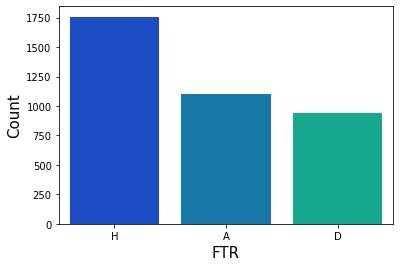

In [ ]:
sns.countplot(data=df,x="FTR",palette="winter",)
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("Count",size=15,color="Black")

Observations:

1. Just By looking at the Counts we can get the Understanding that the Home team has Significantly more wins.
2. Another way of looking at is Away Team is more likely to get a Draw or a loss more often
3. Looking at this it looks like Playing at home is a big advantage.

In [ ]:
df.index

RangeIndex(start=0, stop=3800, step=1)

**Probability Density Function(PDF)**

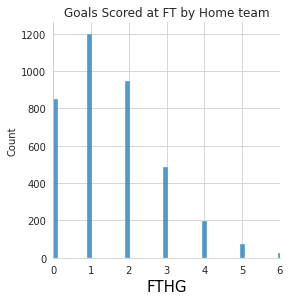

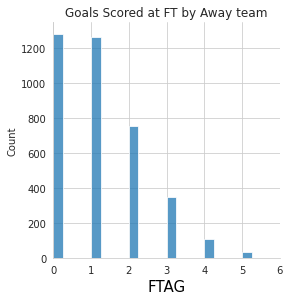

In [ ]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df,height=4) \
   .map(sns.histplot,"FTHG") \
   .add_legend()
plt.xlim(0,6)
plt.xlabel("FTHG",size=15,color="Black")
plt.title("Goals Scored at FT by Home team")
plt.show()


sns.set_style("whitegrid")
sns.FacetGrid(df,height=4,) \
   .map(sns.histplot,"FTAG") \
   .add_legend()
plt.xlabel("FTAG",size=15,color="Black")
plt.title("Goals Scored at FT by Away team")
plt.xlim(0,6)
plt.show()

Observations:

1. Most of the times, Both Home and Away Team scores 1 goal, Frequent scores are (1,0,2 in this sequence).Away team slightly ahead here.
2. However, When it come to more than 2 goals, Home Teams are ahead.

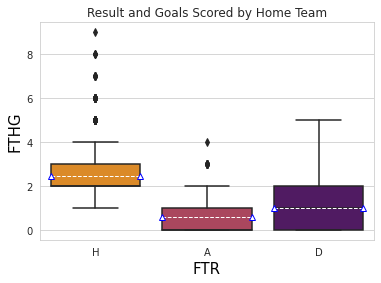

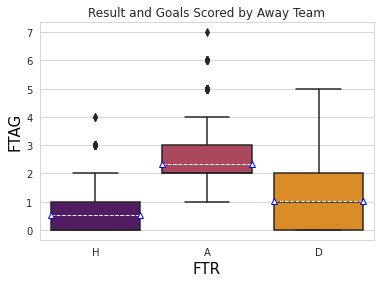

In [ ]:
sns.boxplot(data=df,x="FTR",y="FTHG",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Goals Scored by Home Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTHG",size=15,color="Black")
plt.show()

sns.boxplot(data=df,x="FTR",y="FTAG",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Goals Scored by Away Team")
plt.xlabel("FTR",size=15,color="Black")
plt.ylabel("FTAG",size=15,color="Black")
plt.show()

***Observations:***

**Home Team :**
1. While winning score mean of 2.5 Goals.
2. When Drawn mean is 0.9 Goals
3. When Lost Mean is 0.5 Goals

**Away Team :**

1. 1.While winning score mean of 2.1 Goals.
2. 2.When Drawn mean is 0.9 Goals.
3. When Lost Mean is 0.6 Goals
-> Overall Home Team is Scoring more goals, While will be a huge factor in winning the game.

# **Bi-Variate analysis**

Pair Plots

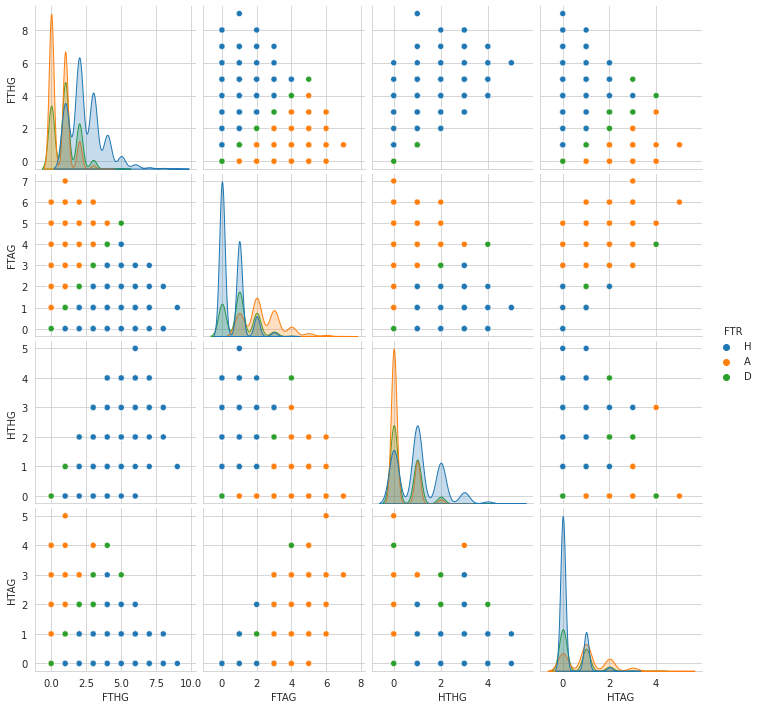

In [ ]:
sns.pairplot(df,hue="FTR")

**Observations:**

FTHG and FTAG are the values which clearly indicate who will win.So studying these 2 variables can be the best way to to predict FTR.
Whichever of the 2 has higher value that team wins, Which translate to the team which score more Goals at FT wins the match.Which is how football works.

Check If a team is Winning at Half Time does it Change at Full Time

Text(0, 0.5, 'Count')

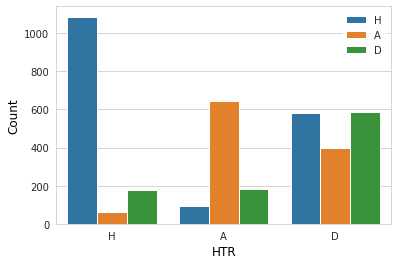

In [ ]:
# Check If a team is Winning at HalfTime does it Change at Full Time.
sns.countplot(data=df,x="HTR",hue="FTR")
plt.legend(edgecolor="White",facecolor="White")
plt.xlabel("HTR",size=12,color="Black")
plt.ylabel("Count",size=12,color="Black")

H : Shows the Home team leading at Half Time.

A : Shows the Away team leading at Half Time.

D : Shows the game was level at Half Time.

1. Blue Bar shows the team went on to Win.
2. Orange Bar shows the team went on and Drew the game.
3. Green Bar shows the team Lost the game at Full time.

**Observation:**


1. The team Leading at Half Time almost always goes on to win the game at Full time.

2. If the game is level at Half Time it is more likely Home team will win than the Away team. Although the most likely outcome is a Draw only.

3. So HTR is a very important variable to determine who wins at Full time.

**Conclusion**:

1. There is a Higher percentage of Home team winning, so clearly the team playing at Home has an advantage.
2. Goals Scored at Full time (FTHG,FTAG) determine FTR i.e. which team will go on to win the game, team which score more Goals at FT wins the match.
3. The Home team usually score more goals. Ex While winning Home team score mean of 2.5 Goals as compared to 2.1 Goals by Away team while winning.
4. HTR is a very important variable to determine who wins at Full time. As we saw the Team winning at Half team does not usually end up Losing at Full time. So this Variable can effectively predict who is likely to win at full time.

One-hot encoding for dummy variables:

In [ ]:
one_hot_encode_cols = df.dtypes[df.dtypes == object]
one_hot_encode_cols

FTR    object
HTR    object
dtype: object

In [ ]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

,0,1,2,3,4
FTR,H,H,A,A,A
HTR,H,H,A,A,A


In [ ]:
df = data[["FTHG","FTAG","FTR","HTHG","HTAG","HTR"]]

In [ ]:
df

,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,2,1,H,1,0,H
1,2,0,H,1,0,H
2,0,2,A,0,1,A
3,0,3,A,0,2,A
4,1,2,A,1,2,A
...,...,...,...,...,...,...
3795,1,0,H,0,0,D
3796,0,0,D,0,0,D
3797,4,0,H,2,0,H
3798,1,1,D,1,1,D


In [ ]:
from sklearn.preprocessing import LabelEncoder

target_labelencoder = LabelEncoder()

df['label_Cat'] = target_labelencoder.fit_transform(df['FTR'])

df.info

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<bound method DataFrame.info of       FTHG  FTAG FTR  HTHG  HTAG HTR  label_Cat
0        2     1   H     1     0   H          2
1        2     0   H     1     0   H          2
2        0     2   A     0     1   A          0
3        0     3   A     0     2   A          0
4        1     2   A     1     2   A          0
...    ...   ...  ..   ...   ...  ..        ...
3795     1     0   H     0     0   D          2
3796     0     0   D     0     0   D          1
3797     4     0   H     2     0   H          2
3798     1     1   D     1     1   D          1
3799     2     1   H     1     1   D          2

[3800 rows x 7 columns]>

In [ ]:
# The encoders

categorical_features = ["HTR"]

numeric_features = ["FTHG","FTAG","HTHG","HTAG"]

y = df['label_Cat'].values

X = df[categorical_features + numeric_features]

colum_transformer = ColumnTransformer([('numerical', MinMaxScaler(), numeric_features),('categorical', OneHotEncoder(), categorical_features),])

X = colum_transformer.fit_transform(X)

print(X)

[[0.22222222 0.14285714 0.2        ... 0.         0.         1.        ]
 [0.22222222 0.         0.2        ... 0.         0.         1.        ]
 [0.         0.28571429 0.         ... 1.         0.         0.        ]
 ...
 [0.44444444 0.         0.4        ... 0.         0.         1.        ]
 [0.11111111 0.14285714 0.2        ... 0.         1.         0.        ]
 [0.22222222 0.14285714 0.2        ... 0.         1.         0.        ]]


In [ ]:
X.shape

(3800, 7)

In [ ]:
y.shape

(3800,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [ ]:
names = ["MLPRegressor", "LinearRegression", "RandomForestRegressor", #"Gaussian Process",
         "KNNRegressor", "LogisticRegression",
         "AdaBoost"]

classifiers = [
    MLPRegressor(random_state=1, max_iter=800),
    LinearRegression(),
    RandomForestRegressor(max_depth=2, random_state=0),
    KNeighborsRegressor(n_neighbors=2),
    LogisticRegression(),
    AdaBoostRegressor(random_state=0, n_estimators=100)]


max_score = 0.0
max_class = ''
score_list = []
clf_list = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    score_list.append(score)
    clf_list.append(name)
    print('Regression  Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Regression Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Regression  Classifier = MLPRegressor, Score (test, accuracy) = 99.51, Training time = 1.85 seconds
Regression  Classifier = LinearRegression, Score (test, accuracy) = 74.78, Training time = 0.00 seconds
Regression  Classifier = RandomForestRegressor, Score (test, accuracy) = 75.75, Training time = 0.24 seconds
Regression  Classifier = KNNRegressor, Score (test, accuracy) = 99.24, Training time = 0.01 seconds
Regression  Classifier = LogisticRegression, Score (test, accuracy) = 96.12, Training time = 0.07 seconds
Regression  Classifier = AdaBoost, Score (test, accuracy) = 92.79, Training time = 0.29 seconds
--------------------------------------------------------------------------------
Best --> Regression Classifier = MLPRegressor, Score (test, accuracy) = 99.51


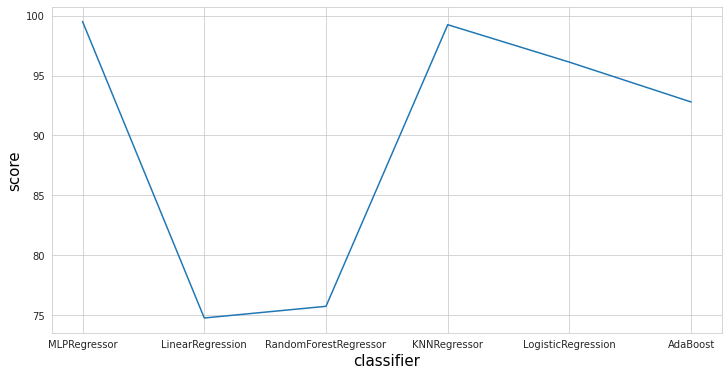

In [ ]:
from IPython.core.pylabtools import figsize
from matplotlib import figure

plt.figure(figsize=(12,6))
plt.plot(clf_list,score_list)
plt.xlabel("classifier",size=15,color="Black")
plt.ylabel("score",size=15,color="Black");

CLassification

In [ ]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    print("______________________________________________________________________________________________________")
    score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), x_train_fold, y_train_fold, cv= kf, scoring="accuracy")
    print(f'RandomForestClassifier Scores for each fold are: {score}')
    print(f'RandomForestClassifier Average score: {"{:.2f}".format(score.mean())}')
    print("______________________________________________________________________________________________________")

    score = cross_val_score(GaussianNB(), x_train_fold, y_train_fold, cv= kf, scoring="accuracy")
    print(f'GaussianNB Scores for each fold are: {score}')
    print(f'GaussianNB Average score: {"{:.2f}".format(score.mean())}')

    print("______________________________________________________________________________________________________")
    score = cross_val_score(XGBClassifier(), x_train_fold, y_train_fold, cv= kf, scoring="accuracy")
    print(f'XGBClassifier Scores for each fold are: {score}')
    print(f'XGBClassifier Average score: {"{:.2f}".format(score.mean())}')

    print("______________________________________________________________________________________________________")
    score = cross_val_score(KNeighborsClassifier(n_neighbors = 5),x_train_fold, y_train_fold, cv=kf, scoring='accuracy')
    print(f'KNeighborsClassifier Scores for each fold are: {score}')
    print(f'KNeighborsClassifier Average score: {"{:.2f}".format(score.mean())}')

    print("______________________________________________________________________________________________________")
    score = cross_val_score(DecisionTreeClassifier(),x_train_fold, y_train_fold, cv=kf, scoring='accuracy')
    print(f'DecisionTreeClassifier Scores for each fold are: {score}')
    print(f'DecisionTreeClassifier Average score: {"{:.2f}".format(score.mean())}')

    print("=============================================================================================================")
    

______________________________________________________________________________________________________
RandomForestClassifier Scores for each fold are: [0.99526627 0.99170616 0.992891  ]
RandomForestClassifier Average score: 0.99
______________________________________________________________________________________________________
GaussianNB Scores for each fold are: [0.65680473 0.70734597 0.70616114]
GaussianNB Average score: 0.69
______________________________________________________________________________________________________
XGBClassifier Scores for each fold are: [1.         0.99763033 0.99763033]
XGBClassifier Average score: 1.00
______________________________________________________________________________________________________
KNeighborsClassifier Scores for each fold are: [0.98224852 0.97630332 0.98578199]
KNeighborsClassifier Average score: 0.98
______________________________________________________________________________________________________
DecisionTreeClassifier 

In [ ]:
from sklearn.utils.validation import check_is_fitted
# Ensemble with basic models

clf_list = [('knn', KNeighborsClassifier()),
            ('naive bayes classifier', GaussianNB()),
            ('random forst classifier', ensemble.RandomForestClassifier()),
            ('XGB Classifier', XGBClassifier()),
            ('DecisionTreeClassifier',DecisionTreeClassifier())]


# Each model accuracy score
for model_tuple in clf_list:
    model = model_tuple[1]
    if 'random_state' in model.get_params().keys():
        model.set_params(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    print(f"{model_tuple[0]}'s accuracy: {acc:.2f}")

knn's accuracy: 0.99
naive bayes classifier's accuracy: 0.68
random forst classifier's accuracy: 0.99
XGB Classifier's accuracy: 1.00
DecisionTreeClassifier's accuracy: 1.00


In [ ]:
clf_list

[('knn', KNeighborsClassifier()),
 ('naive bayes classifier', GaussianNB()),
 ('random forst classifier', RandomForestClassifier(random_state=42)),
 ('XGB Classifier',
  XGBClassifier(objective='multi:softprob', random_state=42)),
 ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42))]

In [ ]:
# Gather the output of all the models and finalize one outcome depending on voting
voting_clf = VotingClassifier(clf_list, voting='soft')
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
print(f"Voting Classifier's accuracy: {accuracy_score(y_pred, y_test):.2f}")

Voting Classifier's accuracy: 1.00


In [ ]:
# Analysing predicted result
pred_result = classification_report(y_test, y_pred)
print(pred_result)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       425
           1       1.00      0.98      0.99       370
           2       1.00      1.00      1.00       725

    accuracy                           1.00      1520
   macro avg       1.00      0.99      0.99      1520
weighted avg       1.00      1.00      1.00      1520



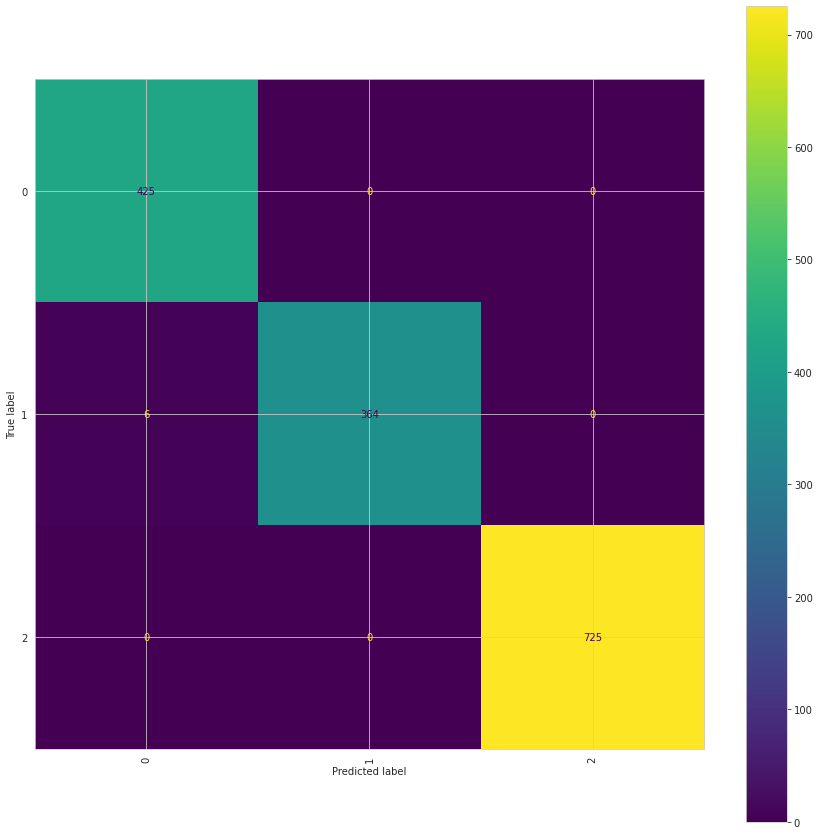

In [ ]:
# confusion matrix to analyse the result.
con_matrix = confusion_matrix(y_test, y_pred, labels=voting_clf.classes_)
figure, axes = plt.subplots(1, figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=voting_clf.classes_)
disp.plot(ax = axes, xticks_rotation='vertical')